In [1]:
!nvidia-smi

Sun Sep  7 09:11:28 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   47C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML
import tensorflow.keras.regularizers as regularizers
l2_regularizer = regularizers.l2(0.001)
import tensorflow as tf
from tensorflow.keras.regularizers import l2
# regularizer = l2(0.001)

In [3]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [4]:
!pip install ultralytics

from IPython import display
display.clear_output()
!yolo mode= checks

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
             ^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/ultralytics/cfg/__init__.py", line 922, in entrypoint
    raise ValueError(f"Invalid 'mode={mode}'. Valid modes are {list(MODES)}.\n{CLI_HELP_MSG}")
ValueError: Invalid 'mode=<module 'ultralytics.utils.checks' from '/usr/local/lib/python3.12/dist-packages/ultralytics/utils/checks.py'>'. Valid modes are ['train', 'export', 'val', 'track', 'predict', 'benchmark'].

    Arguments received: ['yolo', 'mode=', 'checks']. Ultralytics 'yolo' commands use the following syntax:

        yolo TASK MODE ARGS



In [5]:
!pip install bbox


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 120.1 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
opencv-contrib-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.


In [6]:
%matplotlib inline
from PIL import Image

import matplotlib.pyplot as plt
import numpy as np

In [7]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="LAVlZ4gjwlnGTdQ6HRBA")
project = rf.workspace("college-fhobi").project("banana-yoyko")
version = project.version(3)
dataset = version.download("yolov8")



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.6/88.6 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 19.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 49.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 39.6 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to banana-3 in yolov8:: 100%|██████████| 2300/2300 [00:00<00:00, 8083.14it/s]


In [8]:
# work training

import os
from ultralytics import YOLO

# Load a model
model = YOLO('yolov8n.yaml')  # build a new model from YAML
model = YOLO('/content/banana-3/train')  # load a pretrained model (recommended for training)
model = YOLO('yolov8n.yaml').load('yolov8n.pt')  # build from YAML and transfer weights

# Train the model
results = model.train(data='/content/banana-3/data.yaml', epochs=50, imgsz=640)


WARNING ⚠️ Unable to automatically guess model task, assuming 'task=detect'. Explicitly define task for your model, i.e. 'task=detect', 'segment', 'classify','pose' or 'obb'.
Transferred 355/355 items from pretrained weights
Ultralytics 8.3.195 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/banana-3/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train,

In [11]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [12]:
model.save('/content/drive/MyDrive/YOLO_model2.h5')  # Change path as necessary

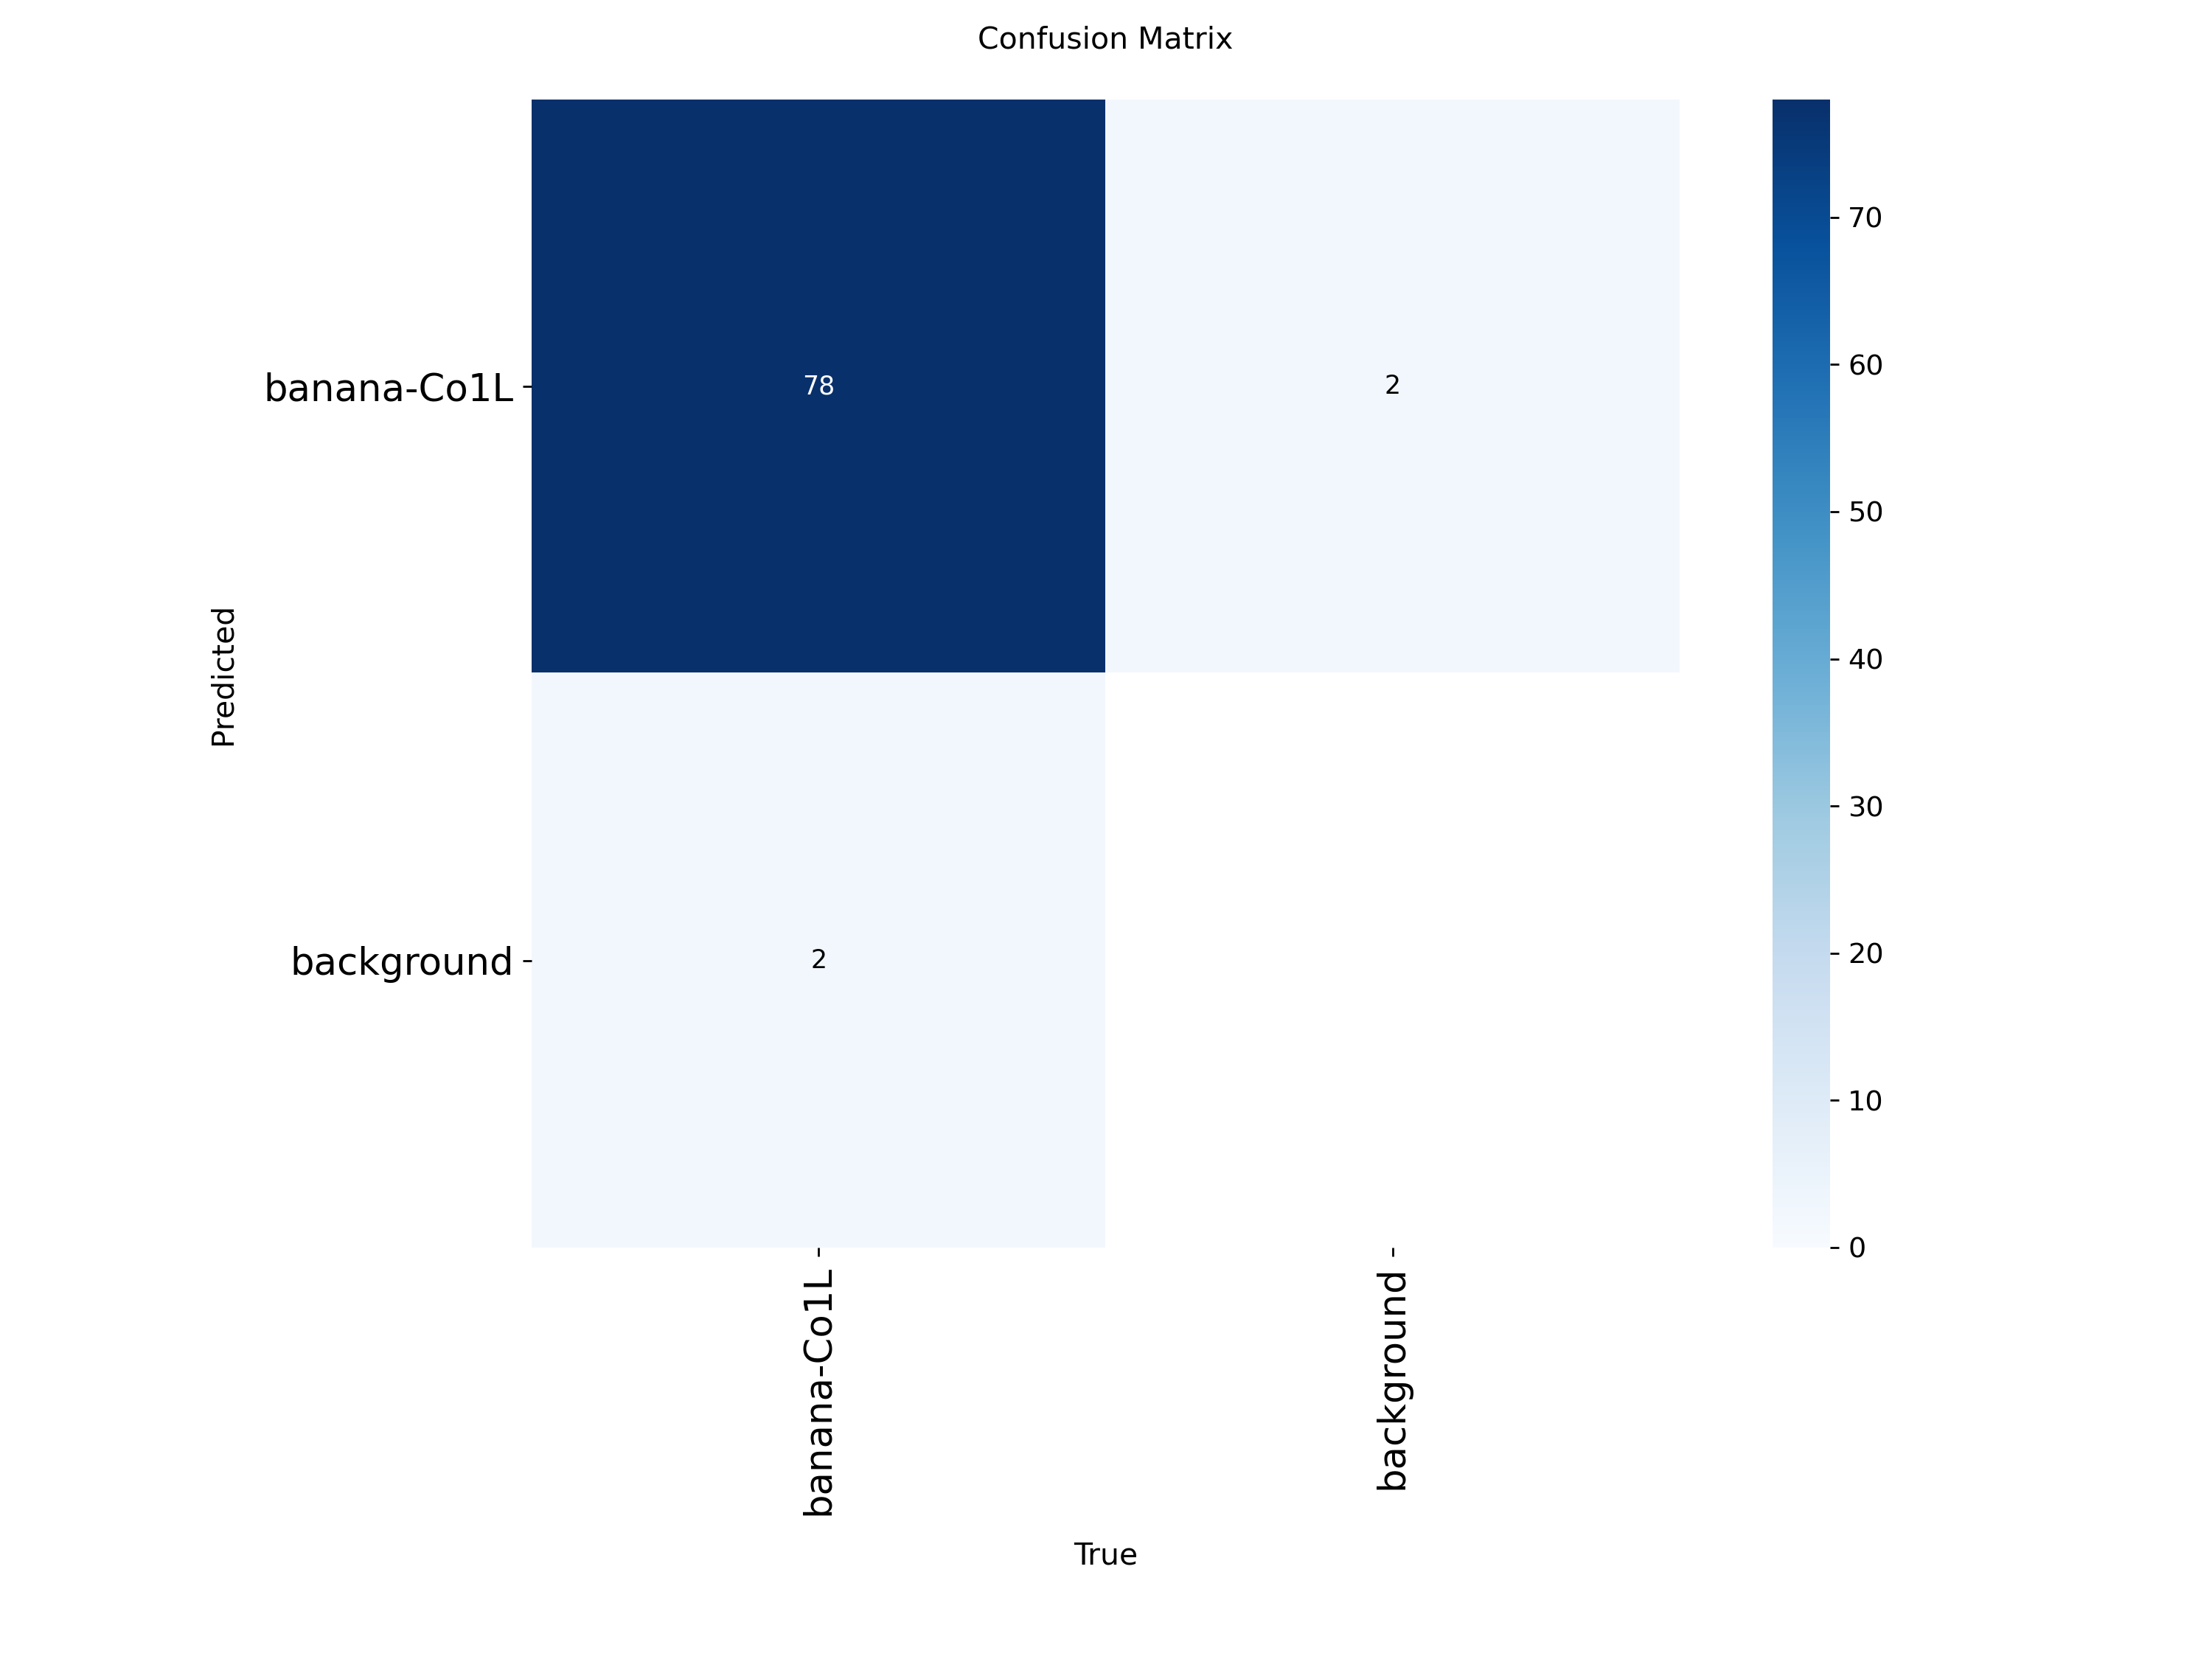

In [13]:
# This code will display the confusion matrix image that is saved in the /content/runs/detect/train/ directory.
from IPython.display import Image
Image(filename = f'/content/runs/detect/train/confusion_matrix.png',width=600)


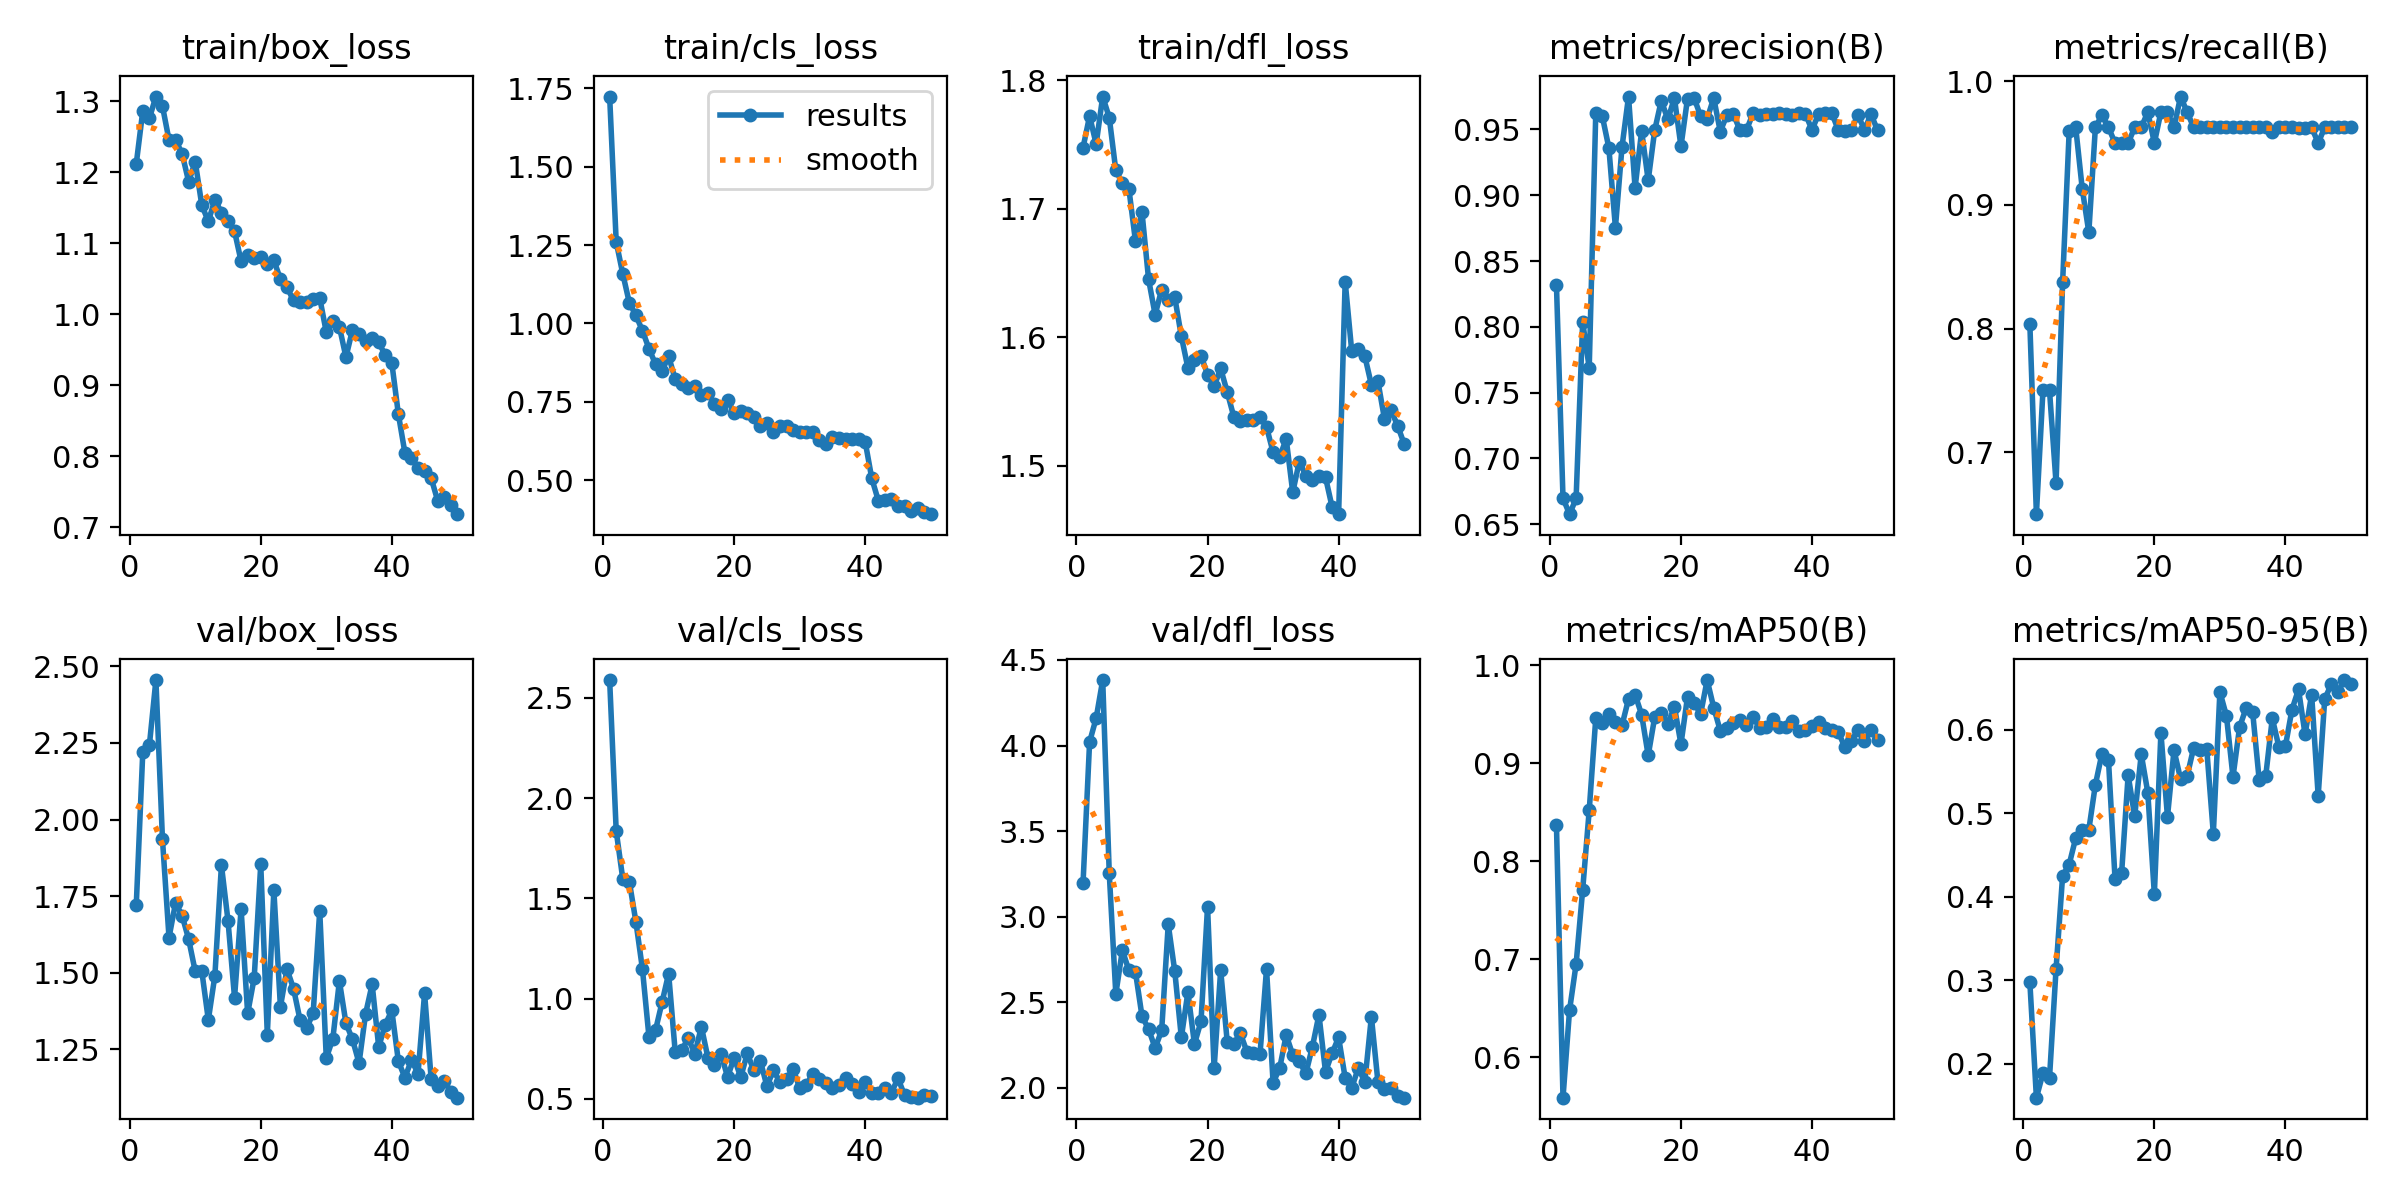

In [14]:
Image(filename = f'/content/runs/detect/train/results.png',width=600)

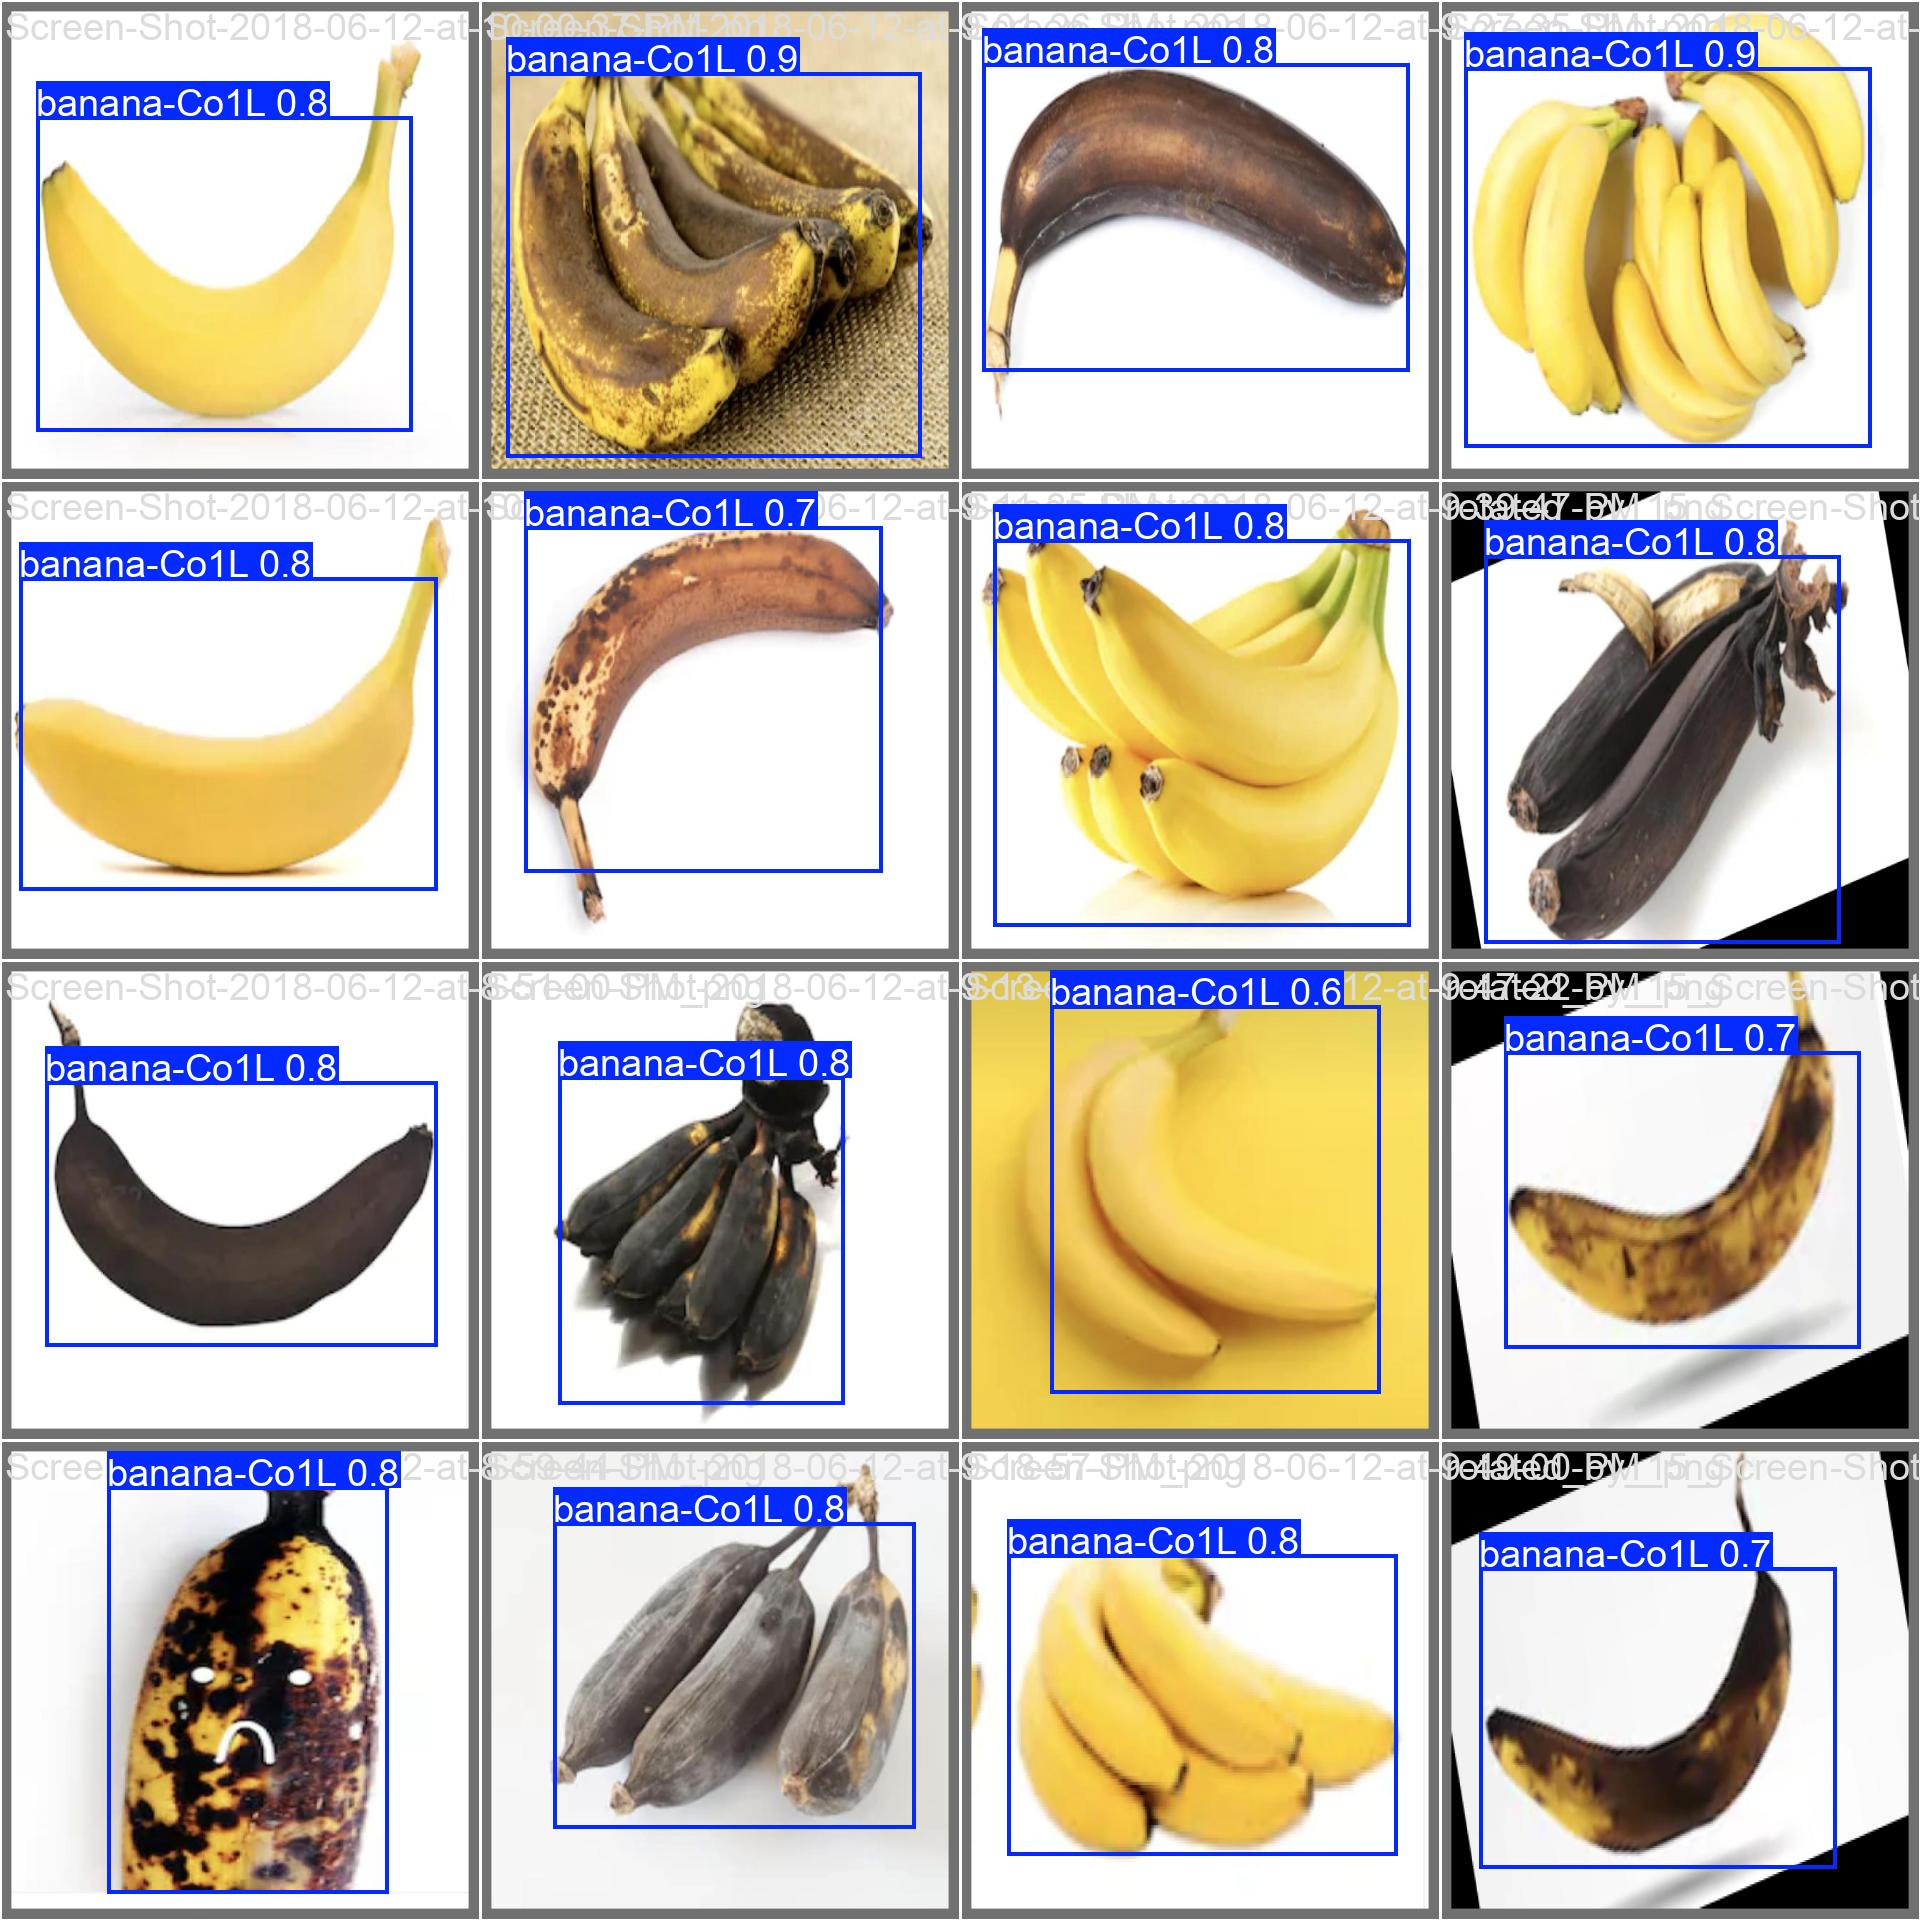

In [15]:
Image(filename = f'/content/runs/detect/train/val_batch0_pred.jpg',width=600)

CNN

In [16]:
import tensorflow as tf
from tensorflow.keras import layers, models


In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1


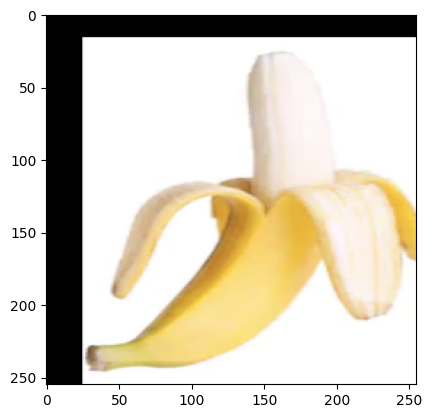

In [18]:
import os
import numpy as np
import cv2
from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define your dataset directory
dataset_dir = '/content/drive/MyDrive/minar_project_dataset/banana/Test'

# Define image size
image_height, image_width = 255,255

# Function to load and preprocess images
def load_images(dataset_dir):
    images = []
    labels = []
    for category in os.listdir(dataset_dir):
        category_dir = os.path.join(dataset_dir, category)
        label = 1 if category == 'fresh' else 0  # Assign labels (0 or 1) based on folder names
        for img_name in os.listdir(category_dir):
            img_path = os.path.join(category_dir, img_name)
            img = cv2.imread(img_path)
            img = cv2.resize(img, (image_height, image_width))
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
            img = img.astype('float32') / 255.0  # Normalize pixel values
            images.append(img)
            labels.append(label)
    return np.array(images), np.array(labels)

# Load and preprocess images
images, labels = load_images(dataset_dir)

# Split the dataset into training and testing sets
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.2, random_state=42)


print(train_labels[1])
import matplotlib.pyplot as plt
plt.imshow(train_images[1])
plt.show()


In [19]:
train_labels[:5]

array([0, 1, 0, 1, 1])

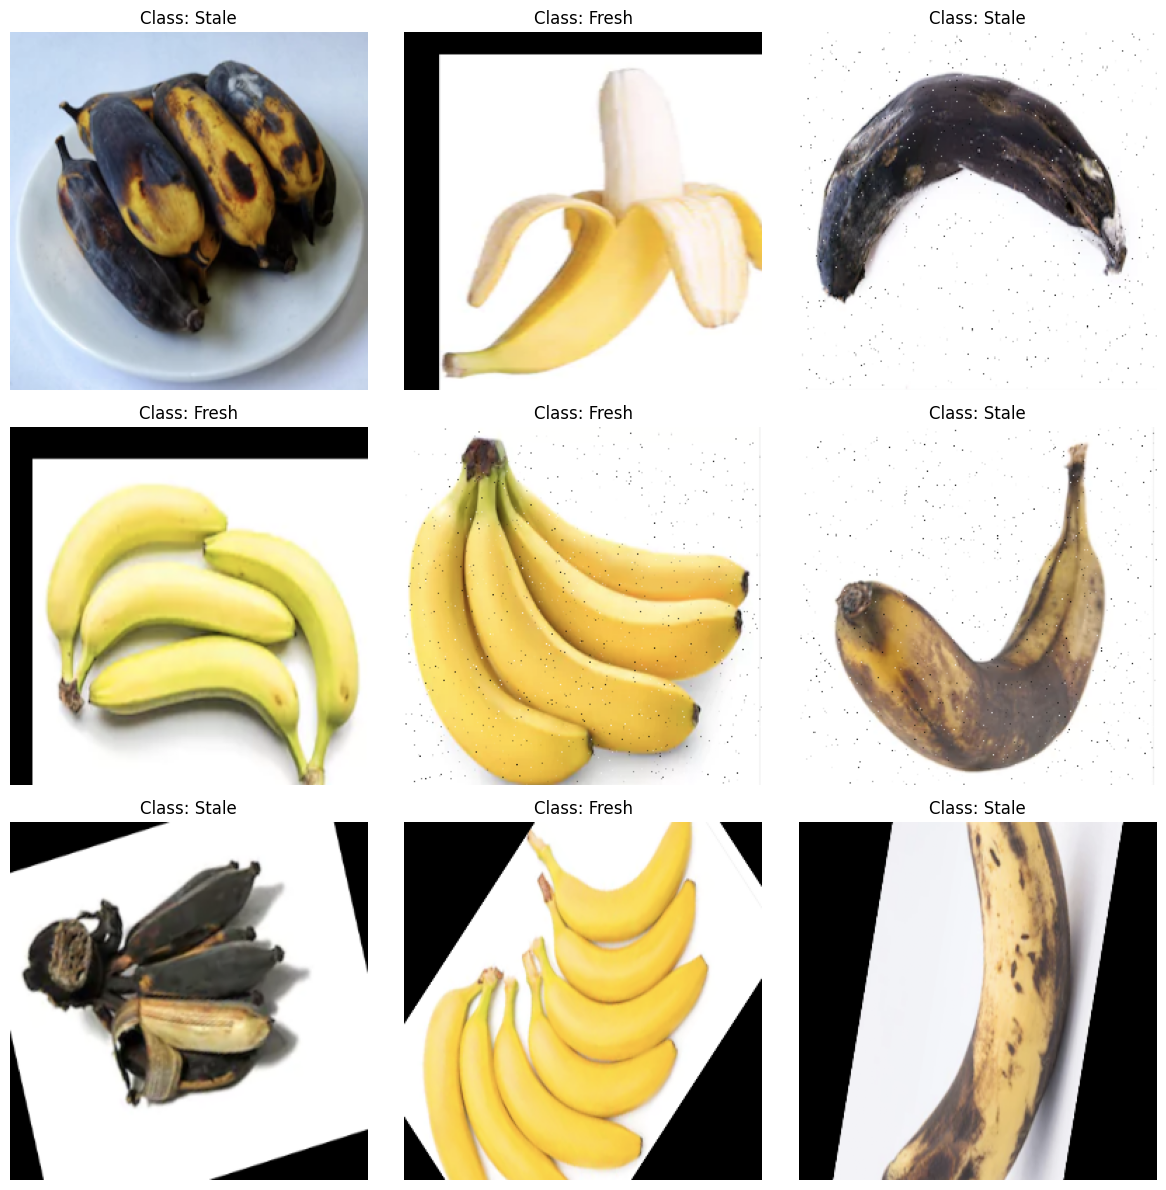

In [39]:

class_names = ['Stale', 'Fresh']

fig, axs = plt.subplots(3, 3, figsize=(12, 12))

for i in range(9):
    axs[i // 3, i % 3].imshow(train_images[i])
    axs[i // 3, i % 3].set_title(f"Class: {class_names[train_labels[i]]}")
    axs[i // 3, i % 3].axis('off')

plt.tight_layout()
plt.show()



In [21]:
num_channels=3
model2 = models.Sequential()

# Convolutional layers
model2.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(image_height, image_width, num_channels)))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(128, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(128, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(128, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(128, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))



# Flatten layer
model2.add(layers.Flatten())

# Dense layers
model2.add(layers.Dense(255, activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid'))


Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


In [22]:
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [23]:
history=model2.fit(train_images, train_labels, epochs=50, validation_data=(train_images, train_labels))


Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 23s 616ms/step - accuracy: 0.5553 - loss: 0.6736 - val_accuracy: 0.5768 - val_loss: 0.5769
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 23s 97ms/step - accuracy: 0.7791 - loss: 0.4716 - val_accuracy: 0.7967 - val_loss: 0.3197
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 96ms/step - accuracy: 0.8275 - loss: 0.2869 - val_accuracy: 0.9433 - val_loss: 0.1757
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - accuracy: 0.9694 - loss: 0.1187 - val_accuracy: 0.9834 - val_loss: 0.0538
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 102ms/step - accuracy: 0.9770 - loss: 0.0687 - val_accuracy: 0.9945 - val_loss: 0.0410
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 99ms/step - accuracy: 0.9960 - loss: 0.0269 - val_accuracy: 0.9502 - val_loss: 0.1380
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 96ms/step - accuracy: 0.9824 - loss: 0.0569 - val_accuracy: 0.9945 - val_loss: 0.0165
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 96ms/step - accuracy: 0.9971 - loss: 0.0142 - val_accuracy: 0.9862

In [24]:
test_loss, test_accuracy = model2.evaluate(test_images, test_labels)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 278ms/step - accuracy: 0.9825 - loss: 0.2305


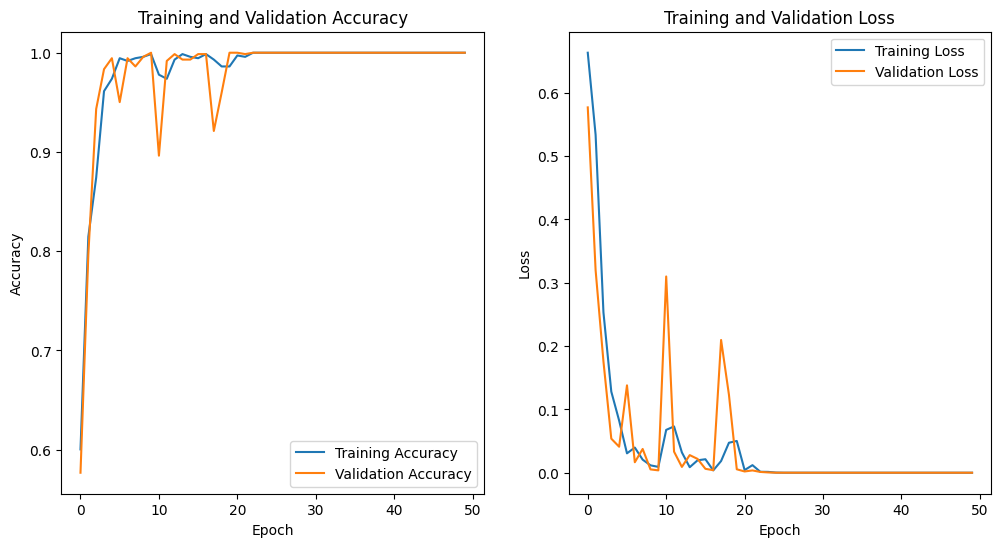

In [25]:

import matplotlib.pyplot as plt

def plot_training_history(history):
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))

    # Plot training and validation accuracy values
    axs[0].plot(history.history['accuracy'], label='Training Accuracy')
    axs[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
    axs[0].set_title('Training and Validation Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_ylabel('Accuracy')
    axs[0].legend()

    # Plot training and validation loss values
    axs[1].plot(history.history['loss'], label='Training Loss')
    axs[1].plot(history.history['val_loss'], label='Validation Loss')
    axs[1].set_title('Training and Validation Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_ylabel('Loss')
    axs[1].legend()

    plt.show()

# Plot training history
plot_training_history(history)


In [26]:
# Save in HDF5 format
model2.save('/content/drive/My Drive/CNN_model.h5')


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 848ms/step


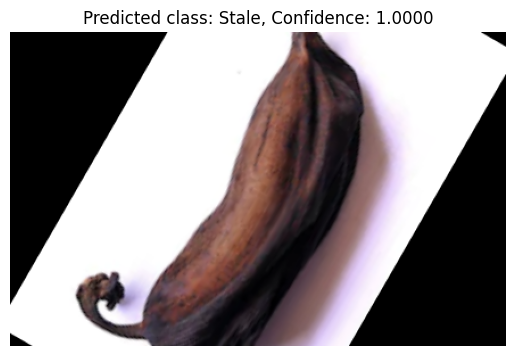

In [27]:
import os
import numpy as np
import cv2
import random
import matplotlib.pyplot as plt
import tensorflow as tf

# Load the trained model
# model12 = tf.keras.models.load_model('/content/path/to/save/your/model2.h5')

# Define image size
image_height, image_width = 255, 255

# Function to preprocess input image(s)
def preprocess_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (image_height, image_width))
    img = img.astype('float32') / 255.0  # Normalize pixel values
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    return img

# Directory containing dataset
dataset_dir = '/content/drive/MyDrive/minar_project_dataset/banana/Test'

# Get list of all image files in the dataset
image_files = []
for category in os.listdir(dataset_dir):
    category_dir = os.path.join(dataset_dir, category)
    image_files.extend([os.path.join(category_dir, file) for file in os.listdir(category_dir)])

# Choose a random image from the dataset
random_image_path = random.choice(image_files)

# Preprocess the random image
input_image = preprocess_image(random_image_path)

# Get prediction for the random image
predictions = model2.predict(input_image)
predicted_class = "Fresh" if predictions[0][0] > 0.5 else "Stale"  # Adjust based on your labels
confidence = predictions[0][0] if predicted_class == "Fresh" else (1 - predictions[0][0])  # Confidence score

# Display the random image along with its predicted class
img = cv2.imread(random_image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for display
plt.imshow(img)
plt.title(f"Predicted class: {predicted_class}, Confidence: {confidence:.4f}")
plt.axis('off')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


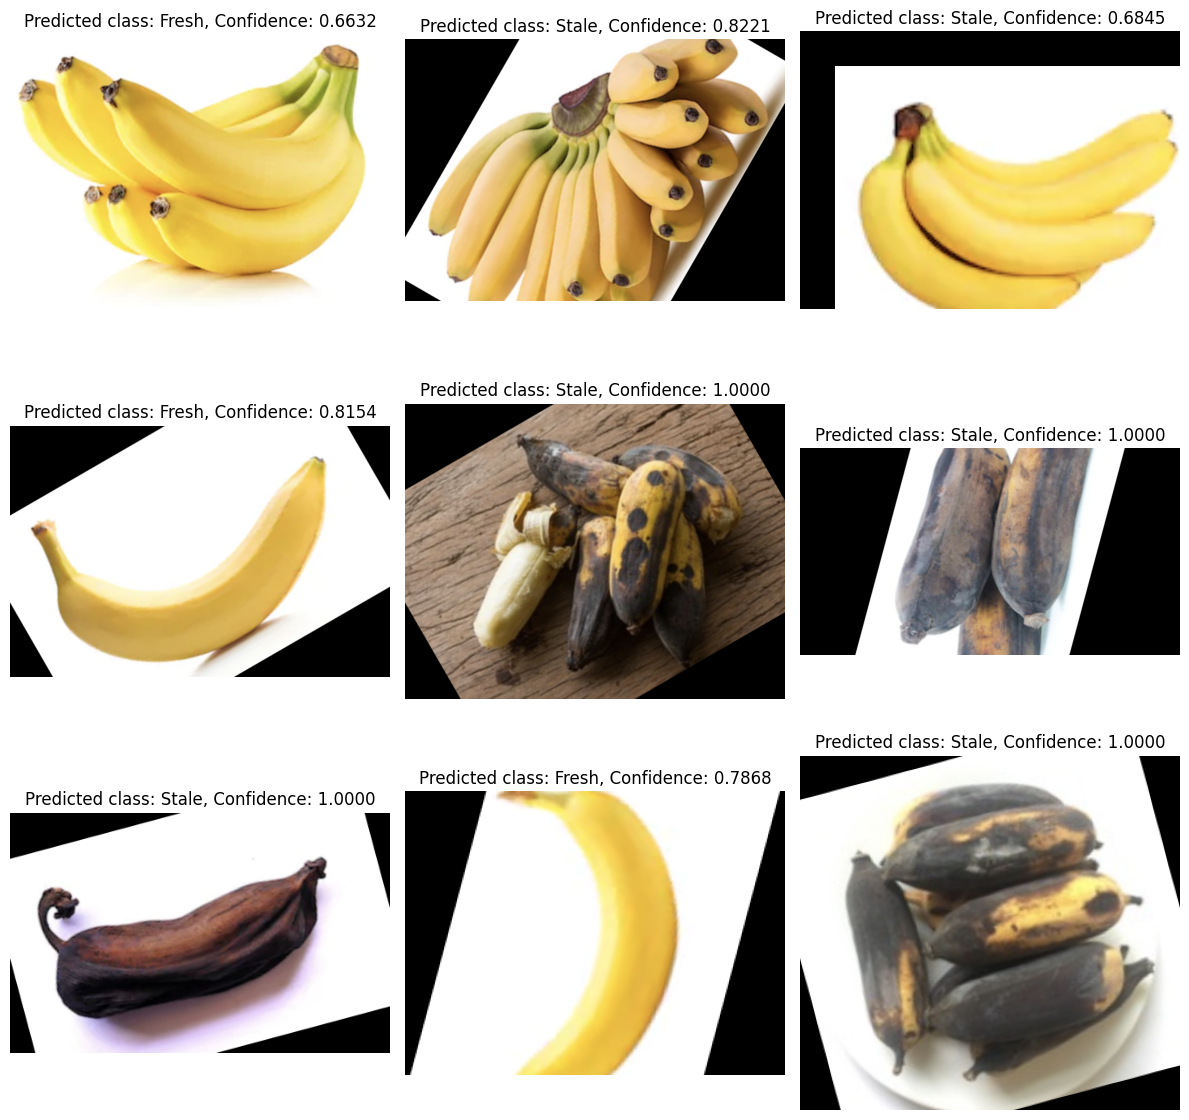

In [28]:
import os
import numpy as np
import cv2
import random
import matplotlib.pyplot as plt
import tensorflow as tf

# Load the trained model
# model12 = tf.keras.models.load_model('/content/path/to/save/your/model2.h5')

# Define image size
image_height, image_width = 255, 255

# Function to preprocess input image(s)
def preprocess_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (image_height, image_width))
    img = img.astype('float32') / 255.0  # Normalize pixel values
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    return img

# Directory containing dataset
dataset_dir = '/content/drive/MyDrive/minar_project_dataset/banana/Test'

# Get list of all image files in the dataset
image_files = []
for category in os.listdir(dataset_dir):
    category_dir = os.path.join(dataset_dir, category)
    image_files.extend([os.path.join(category_dir, file) for file in os.listdir(category_dir)])

# Choose 9 random images from the dataset
random_image_paths = random.sample(image_files, 9)

# Create a subplot with 3 rows and 3 columns
fig, axs = plt.subplots(3, 3, figsize=(12, 12))

# Loop through each random image
for i, image_path in enumerate(random_image_paths):
    # Preprocess the image
    input_image = preprocess_image(image_path)

    # Get prediction for the image
    predictions = model2.predict(input_image)
    predicted_class = "Fresh" if predictions[0][0] > 0.5 else "Stale"  # Adjust based on your labels
    confidence = predictions[0][0] if predicted_class == "Fresh" else (1 - predictions[0][0])  # Confidence score

    # Display the image along with its predicted class
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for display
    axs[i // 3, i % 3].imshow(img)
    axs[i // 3, i % 3].set_title(f"Predicted class: {predicted_class}, Confidence: {confidence:.4f}")
    axs[i // 3, i % 3].axis('off')

plt.tight_layout()
plt.show()


### Start Testing

In [29]:
import os.path
from os import path

if path.exists('/content/banana_yolo_cut_picture') == False:
  os.mkdir('/content/banana_yolo_cut_picture')

os.chdir('/content/banana_yolo_cut_picture')


In [30]:
from ultralytics import YOLO

import cv2

# Load the YOLOv8 model
model = YOLO('/content/yolov8n.pt')

# Perform inference on an image
results = model('/content/drive/MyDrive/Image/WhatsApp Image 2024-03-22 at 21.57.04_16251db0.jpg')

# Load the original image
image = "/content/drive/MyDrive/Image/WhatsApp Image 2024-03-22 at 21.57.04_16251db0.jpg"
img = cv2.imread(image)

# Extract bounding boxes
boxes = results[0].boxes.xyxy.tolist()

new_path='/content/banana_yolo_cut_picture'

# Iterate through the bounding boxes
for i, box in enumerate(boxes):
    x1, y1, x2, y2 = box
    # Crop the object using the bounding box coordinates
    ultralytics_crop_object = img[int(y1):int(y2), int(x1):int(x2)]
    # Save the cropped object as an image
    cv2.imwrite('/content/banana_yolo_cut_picture/ultralytics_crop_' + str(i) + '.jpg', ultralytics_crop_object)


image 1/1 /content/drive/MyDrive/Image/WhatsApp Image 2024-03-22 at 21.57.04_16251db0.jpg: 640x480 1 person, 1 banana, 43.8ms
Speed: 4.9ms preprocess, 43.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


Input image:


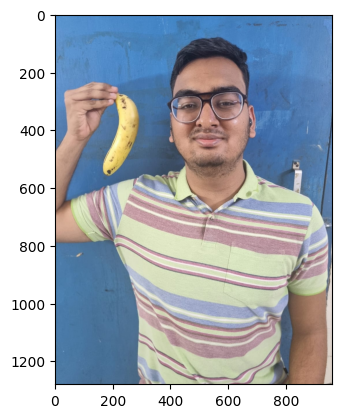

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Predicted class: stale_banana
Confidence: 0.9995457


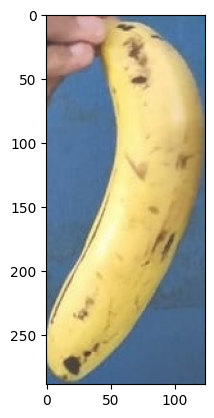

In [46]:
import tensorflow as tf
import cv2
import numpy as np

# importing required libraries
import matplotlib.pyplot as plt
import matplotlib.image as img

image_path2='/content/drive/MyDrive/Image/WhatsApp Image 2024-03-22 at 21.57.04_16251db0.jpg'
print("Input image:")
testImage2 = img.imread(image_path2)

# displaying the image
plt.imshow(testImage2)
# plt.imshow(image_path)
plt.show()

# Load the trained model
# model = tf.keras.models.load_model('/content/drive/MyDrive/minar_project_dataset/train/stale_apple/Screen Shot 2018-06-07 at 2.15.50 PM.png')

# Function to preprocess input image(s)
def preprocess_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (image_height, image_width))
    img = img.astype('float32') / 255.0  # Normalize pixel values
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    return img

# Example usage: Get prediction for a single image
# image_path = '/content/drive/MyDrive/Image/image3.jpg'

image_path = '/content/banana_yolo_cut_picture/ultralytics_crop_1.jpg'
# image_path = '/content/drive/MyDrive/minar_project_dataset/test/stale_apple/vertical_flip_Screen Shot 2018-06-08 at 2.29.33 PM.png'

input_image = preprocess_image(image_path)
predictions = model2.predict(input_image)

# Interpret the predictions
predicted_class = "fresh_banana" if predictions[0][0] > 0.5 else "stale_banana"  # Adjust based on your labels
confidence = predictions[0][0] if predicted_class == "fresh_banana|" else 1 - predictions[0][0]  # Confidence score
print("Predicted class:", predicted_class)
print("Confidence:", confidence)



# reading the image
testImage = img.imread(image_path)

# displaying the image
plt.imshow(testImage)
# plt.imshow(image_path)
plt.show()